In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt, rcParams
#import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import seaborn as sns
from django.conf import settings
rcParams['figure.figsize'] = 11,10


# Creating DataFrame

# Exploritory Data Analysis


In [2]:
link = '../datasets/medical_aid_claims.csv'
df = pd.read_csv(link)

In [3]:
df['cause'].value_counts()


Road Traffic Accident    1780
Accident At Home         1744
Other                    1743
Accident At Work         1733
Name: cause, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   member-name           7000 non-null   object
 1   email                 7000 non-null   object
 2   gender                7000 non-null   object
 3   location              7000 non-null   object
 4   employer              7000 non-null   object
 5   relationship          7000 non-null   object
 6   patient_name          7000 non-null   object
 7   patient_suffix        7000 non-null   int64 
 8   patient_dob           7000 non-null   object
 9   cause                 7000 non-null   object
 10  Fee Charged           7000 non-null   int64 
 11  membership_period     7000 non-null   int64 
 12  number_of_claims      7000 non-null   int64 
 13  number_of_dependants  7000 non-null   int64 
 14  label                 7000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 8

In [29]:
df.head()

,member-name,email,gender,location,employer,relationship,patient_name,patient_suffix,patient_dob,cause,Fee Charged,membership_period,number_of_claims,number_of_dependants,label
0,Chipi,ajimmison0@sun.com,female,Kwekwe,Vipe,Grandfather,Mabhena,789,9/11/1997,Other,3798,1541,2,4,0
1,Femba,rsoonhouse1@google.it,female,Marondera,Mudo,Husband,Sithole,860,1/14/1992,Other,48905,8269,4,3,0
2,Geta,bchecchetelli2@house.gov,female,Rusape,Skaboo,Mother,Chipi,374,7/3/1999,Road Traffic Accident,39963,6223,2,2,0
3,Tichaona,mgarman3@psu.edu,female,Rusape,Babbleset,Father,Jembwa,729,7/31/1978,Road Traffic Accident,34948,8832,6,3,0
4,Chisa,ccough4@biglobe.ne.jp,female,Bulawayo,Flipopia,Father,Foto,716,12/28/1992,Accident At Work,46984,8804,1,2,1


In [5]:
df.isnull().sum()

member-name             0
email                   0
gender                  0
location                0
employer                0
relationship            0
patient_name            0
patient_suffix          0
patient_dob             0
cause                   0
Fee Charged             0
membership_period       0
number_of_claims        0
number_of_dependants    0
label                   0
dtype: int64

In [6]:
df['label'].value_counts()

0    5621
1    1379
Name: label, dtype: int64

# Data Visualization to establish Patterns within the data

<Axes: xlabel='location'>

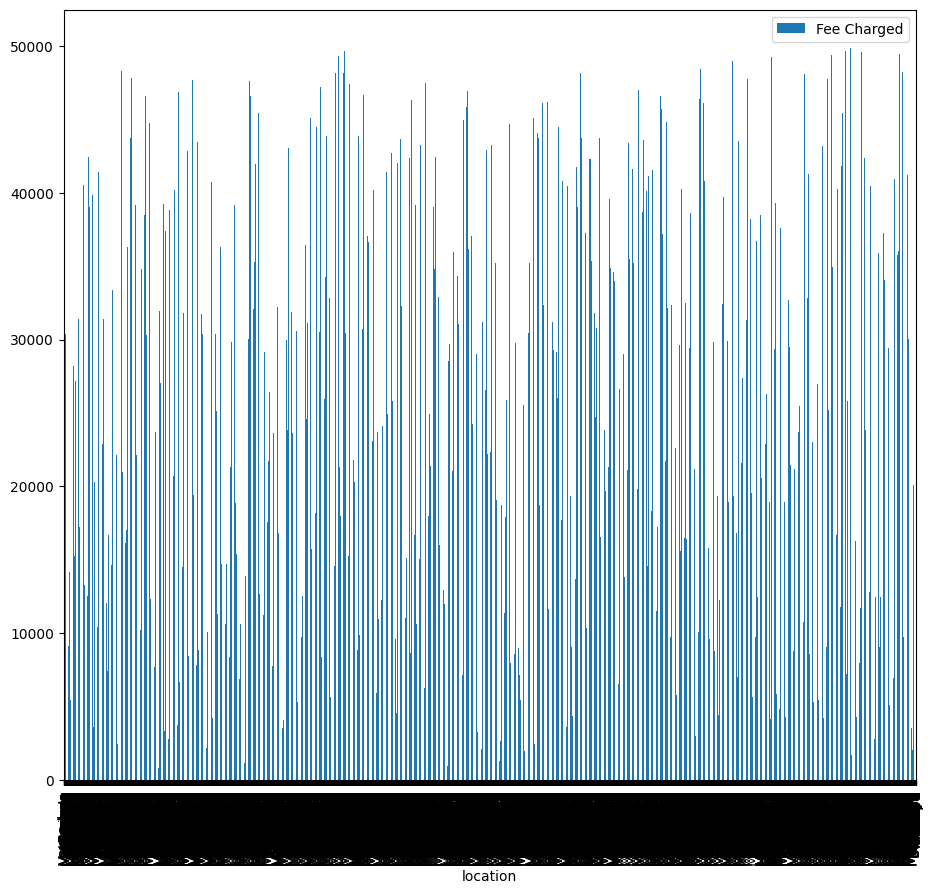

In [7]:
df.plot(x='location', y="Fee Charged", kind='bar')

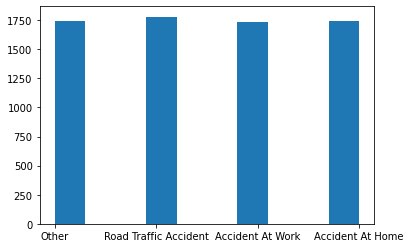

In [22]:
plt.hist(df["cause"])
plt.show()
# sns.lmplot('cause', 'Fee Charged', df, hue='label', fit_reg=False)
# fig = plt.gcf()
# fig.set_size_inches(15,10)
# plt.show()

In [8]:
df['label'].value_counts()

0    5621
1    1379
Name: label, dtype: int64

In [9]:
matrix = df.corr()
matrix['label'].sort_values(ascending=False)

/var/folders/_c/7lqh59s12gxb4nhgp6mzjty00000gn/T/ipykernel_85456/1759958773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


label                   1.000000
Fee Charged             0.011846
patient_suffix         -0.001051
number_of_claims       -0.005216
membership_period      -0.010831
number_of_dependants   -0.015572
Name: label, dtype: float64

<Axes: >

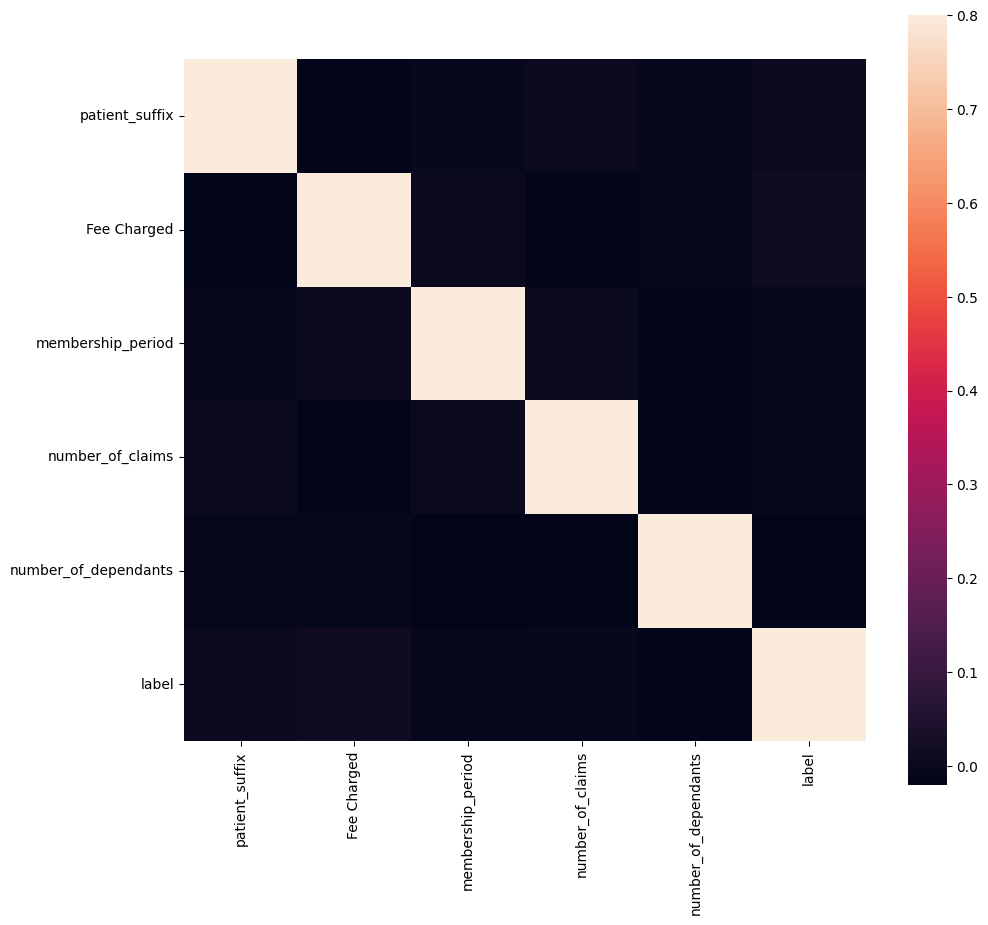

In [10]:
sns.heatmap(matrix, vmax=0.8, square=True)


# Creating a Data Transformation Pipeline for numerical and catagorical features


In [35]:
#defing a data transformation pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler
num_pipe = Pipeline([
('imputer', Imputer(strategy="median")),
('std_scaler', StandardScaler()),
])

pipe = ColumnTransformer([
("num", num_pipe, ['patient_suffix','Fee Charged','membership_period', 'number_of_claims','number_of_dependants']),
("cat", OneHotEncoder(), ['member-name','email','location','gender','relationship','employer', 'gender','patient_name','cause'])
])





# Separating data feature from target feature(classification label) and feature    transformation


In [36]:
target = "label"
X = df.drop(target, axis=1)  #training set
y = df[target]   #labels
print(X.columns)
#transforming the data
pipe= pipe.fit(X)
joblib.dump(pipe,'pipeline.pkl')
X = pipe.transform(X)
X.shape

Index(['member-name', 'email', 'gender', 'location', 'employer',
       'relationship', 'patient_name', 'patient_suffix', 'patient_dob',
       'cause', 'Fee Charged', 'membership_period', 'number_of_claims',
       'number_of_dependants'],
      dtype='object')


(7000, 7469)

# Initialization of ML Algorithms

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
svm_clf = SVC()
kn_clf = KNeighborsClassifier(5)
dt_clf = DecisionTreeClassifier( criterion='entropy',splitter="best", max_leaf_nodes=15)

# Training and Testing Each Algorithm (SVM classifier, Decision Tree Classifier, KNN Classifier)

In [39]:
classifier_accuracy = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
svm_clf = SVM_clf.fit(X_train, y_train)
y_pred = SVM_clf.predict(X_test)
n_errors = (y_pred !=y_test).sum()
print('{}:{}'.format('SVM Classifier',n_errors))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
classifier_accuracy.update({'SVM_clf':accuracy_score(y_test, y_pred)})

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
kn_clf = Kn_clf.fit(X_train, y_train)
y_pred = Kn_clf.predict(X_test)
n_errors = (y_pred !=y_test).sum()
print('{}:{}'.format('KNN Classifier',n_errors))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
classifier_accuracy.update({'Knn_clf':accuracy_score(y_test, y_pred)})

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
dt_clf = DT_clf.fit(X_train, y_train)
y_pred = DT_clf.predict(X_test)
n_errors = (y_pred !=y_test).sum()
print('{}:{}'.format('DT Classifier',n_errors))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
classifier_accuracy.update({'DT_clf':accuracy_score(y_test, y_pred)})

SVM Classifier:400
Accuracy Score: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1700
           1       0.00      0.00      0.00       400

    accuracy                           0.81      2100
   macro avg       0.40      0.50      0.45      2100
weighted avg       0.66      0.81      0.72      2100

[[1700    0]
 [ 400    0]]


/Users/user/.virtualenvs/meds-app/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/.virtualenvs/meds-app/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/.virtualenvs/meds-app/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

KNN Classifier:466
Accuracy Score: 0.7780952380952381
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1700
           1       0.22      0.07      0.10       400

    accuracy                           0.78      2100
   macro avg       0.52      0.51      0.49      2100
weighted avg       0.70      0.78      0.73      2100

[[1608   92]
 [ 374   26]]
DT Classifier:413
Accuracy Score: 0.8033333333333333
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1700
           1       0.16      0.01      0.01       400

    accuracy                           0.80      2100
   macro avg       0.48      0.50      0.45      2100
weighted avg       0.69      0.80      0.72      2100

[[1684   16]
 [ 397    3]]


# Plotting Algorithm Performance

In [40]:
ca = [[a,b] for a,b in classifier_accuracy.items()]
ca = pd.DataFrame(ca, columns=['Classifier','Accuracy'])
ca

,Classifier,Accuracy
0,SVM_clf,0.809524
1,Knn_clf,0.778095
2,DT_clf,0.803333


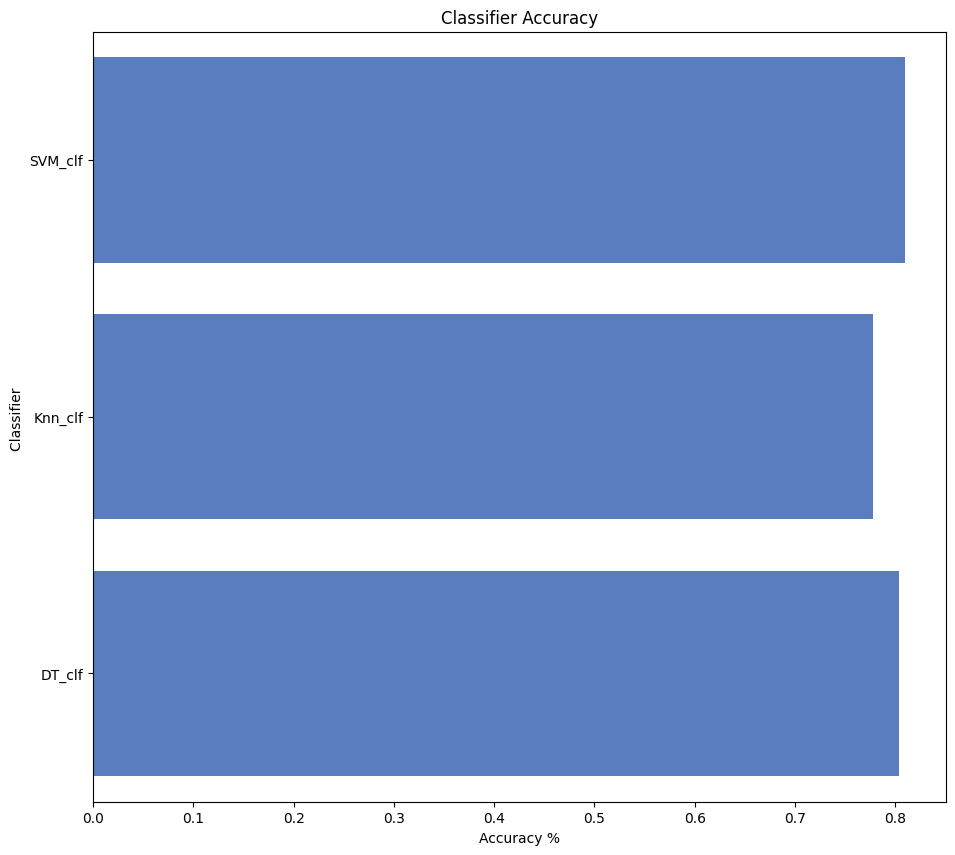

In [41]:
import seaborn as sns
sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=ca, color='b')
plt.xlabel('Accuracy %')
plt.ylabel('Classifier ')
plt.title('Classifier Accuracy')
plt.show()

# HyperParameter Tuning for the SVM Classifer Using Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   1.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   1.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [45]:
grid_predictions = grid.predict(X_test)

In [46]:
print('{}:{}'.format('Grid SVM Classifier',n_errors))
print('Accuracy Score:',accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))
print(confusion_matrix(y_test, grid_predictions))

Grid SVM Classifier:413
Accuracy Score: 0.8095238095238095
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1700
           1       0.00      0.00      0.00       400

    accuracy                           0.81      2100
   macro avg       0.40      0.50      0.45      2100
weighted avg       0.66      0.81      0.72      2100

[[1700    0]
 [ 400    0]]


/Users/user/.virtualenvs/meds-app/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/.virtualenvs/meds-app/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/.virtualenvs/meds-app/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Classifying a Test Medical Aid Claim

In [47]:
data ={'member-name': 'Evans', 'gender': 'male', 'email': 'raskawrq@washington.edu', 'location': 'Gweru', 'employer': 'Mudo', 'relationship': 'Uncle', 'patient_name': 'Samvura', 'patient_suffix': '677', 'patient_dob': '09/10/1986', 'number_of_dependants': '3', 'Fee Charged': '6700', 'cause': 'Accident At Work', 'number_of_claims': '2', 'membership_period': '4'}

In [48]:
new_data = {}
new_data['member-name'] = data['member-name']
new_data['email'] = data['email']
new_data['gender']= data['gender']
new_data['location'] = data['location']



# Add new data to DataFrame for processing

In [49]:
d = pd.DataFrame(data, index=[0])
d

,member-name,gender,email,location,employer,relationship,patient_name,patient_suffix,patient_dob,number_of_dependants,Fee Charged,cause,number_of_claims,membership_period
0,Evans,male,raskawrq@washington.edu,Gweru,Mudo,Uncle,Samvura,677,09/10/1986,3,6700,Accident At Work,2,4


# Transformation of the data frame into valid ML algorithm inputs

In [50]:

X  = pipe.transform(d)

In [51]:
X.shape

(1, 7469)

# Classifying the the data input as Fraudulent or Clean

In [52]:
grid_predictions = grid.predict(X)

# the Medical Aid Claim is classified as Clean


In [53]:
grid_predictions[0]

0

In [54]:
# a classification of 0 is a clean claim, and 1 is a fraudulent claim

In [55]:
joblib.dump(grid,'model.pkl')

['model.pkl']